# <center> **2.1 Proyecto - Predicción de rendimiento financiero en Las empresas del Ecuador realizando un Analisis Predictivo de ROE/ROA a través de indicadores financieros del 2019.**

>## ***Prediccion de los años: 2017, 2018, 2020***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
from scipy import stats
import torch
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/datasets/IA/indicadores2019_cia.xlsx", index_col=0)
df.sample(5)

,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
ID,,,,,,,,,,,,,,,,,,,,,
34374,2019,144777,FACTORINVEST S.A.,N,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,N8211.00,N82,1126.883300,1126.883300,0.518959,...,0.033150,-0.082899,1.0,-6.245850,-5.773167,-0.186443,-0.172333,-0.089687,-0.172333,-0.082899
7827,2019,42707,INMOBILIARIA INMOQUIN SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.707485,1.707485,0.049491,...,0.001643,0.001370,1.0,0.025769,0.015995,0.002322,0.001442,0.002207,0.001442,0.001370
20010,2019,99154,PROYECTOS L.T.L. S.A.,F,CONSTRUCCIÃ“N.,F4210.11,F42,NaN,NaN,0.969948,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
84681,2019,726007,IMPORTADORA LICHARD IMPORTLIC S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4690.00,G46,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
49369,2019,176580,COMPAÃ‘IA DE TRANSPORTE PESADO TRANSLLONMARTZ ...,H,TRANSPORTE Y ALMACENAMIENTO.,H4923.01,H49,3.554761,3.554761,0.281313,...,0.000000,0.090179,1.0,0.026224,0.016718,0.196828,0.125477,0.141458,0.125477,0.090179


# ***PRE-PROCESAMIENTO***

In [ ]:
print("Dimensiones antes: {}".format(df.shape))

Dimensiones antes: (85793, 37)


In [ ]:
df.isnull().sum()

AÑO                                            0
EXPEDIENTE                                     0
NOMBRE                                         1
RAMA                                          19
DESCRIPCIÓN RAMA                              19
RAMA 6 DÍGITOS                                33
SUBRAMA 2 DÍGITOS                             33
LIQUIDEZ CORRIENTE                         24414
PRUEBA ÁCIDA                               24414
ENDEUDAMIENTO DEL ACTIVO                    4974
ENDEUDAMIENTO PATRIMONIAL                   4771
ENDEUDAMIENTO A CORTO PLAZO                22087
ENDEUDAMIENTO A LARGO PLAZO                22087
COBERTURA DE INTERESES                     47509
ENDEUDAMIENTO DEL ACTIVO FIJO              38116
APALANCAMIENTO                              4771
APALANCAMIENTO FINANCIERO                  23817
FORTALEZA PATRIMONIAL                       4771
ENDEUDAMIENTO PATRIMONIAL CORRIENTE         4771
ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE      4771
APALANCAMIENTO A COR

In [ ]:
df.duplicated().any()
df.dropna(inplace=True)
df.shape

(14308, 37)

# ***ANÁLISIS EXPLORATORIO CORRELACIONAL***

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


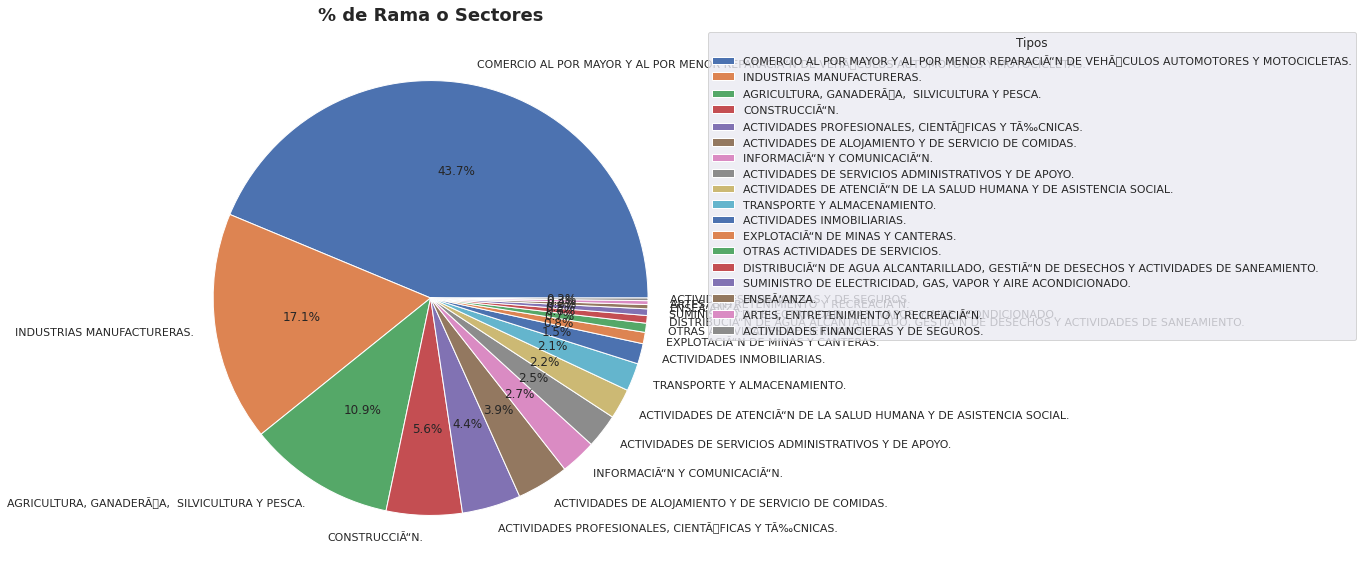

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
plt.pie(df['RAMA'].value_counts(), autopct='%1.1f%%', labels=df['DESCRIPCIÓN RAMA'].value_counts().index)
plt.title('% de Rama o Sectores', fontsize=18, fontweight='bold')
plt.legend(title ="Tipos",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

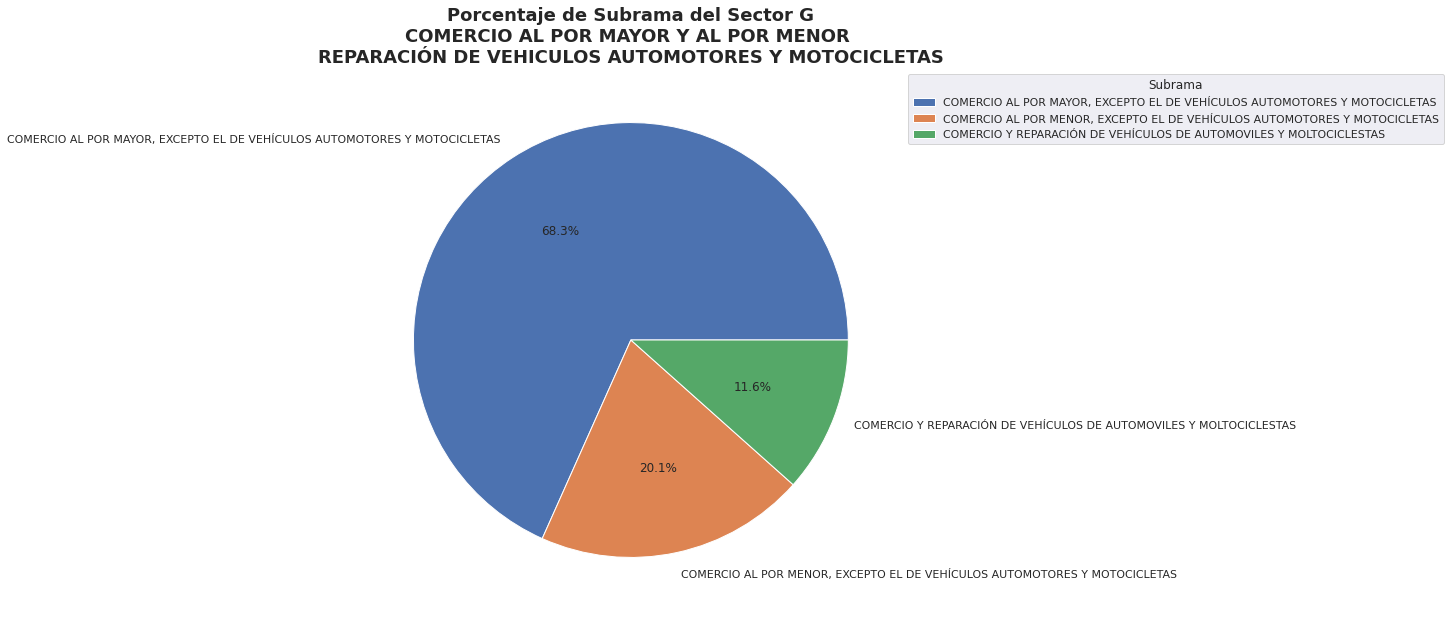

In [ ]:
plt.pie(df[df['RAMA']=='G']['SUBRAMA 2 DÍGITOS'].value_counts(), autopct='%1.1f%%', labels=['COMERCIO AL POR MAYOR, EXCEPTO EL DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS', 
                                                                                                                                'COMERCIO AL POR MENOR, EXCEPTO EL DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS', 
                                                                                                                                'COMERCIO Y REPARACIÓN DE VEHÍCULOS DE AUTOMOVILES Y MOLTOCICLESTAS'])
plt.title('Porcentaje de Subrama del Sector G\nCOMERCIO AL POR MAYOR Y AL POR MENOR \nREPARACIÓN DE VEHICULOS AUTOMOTORES Y MOTOCICLETAS', fontsize=18, fontweight='bold')
plt.legend(title ="Subrama",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()



> ## **ANÁLISIS DE ROE POR RAMAS**



In [ ]:
print("Skewness: {}".format(df['ROE'].skew()))
print("Kurtosis: {}".format(df['ROE'].kurt()))
print("---------------------------")
print(df['ROE'].describe())

Skewness: 21.325846842670153
Kurtosis: 6277.201310684813
---------------------------
count    14308.000000
mean        -0.078294
std         14.594107
min      -1062.466900
25%          0.001478
50%          0.062521
75%          0.209866
max       1293.094400
Name: ROE, dtype: float64


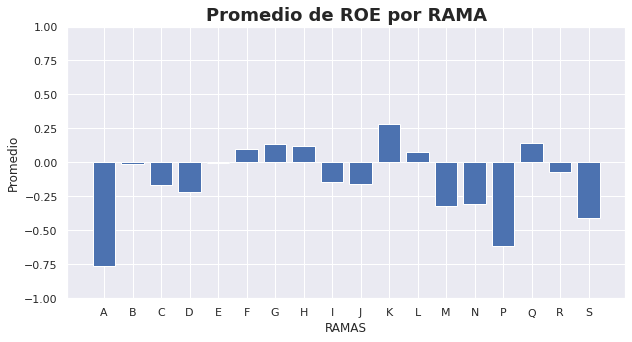

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
plt.bar(df.groupby('RAMA').mean()['ROE'].index, df.groupby('RAMA').mean()['ROE'], align='center')
plt.title("Promedio de ROE por RAMA", fontsize=18, fontweight='bold')
plt.xlabel("RAMAS")
plt.ylabel("Promedio")
plt.ylim(-1, 1)
plt.show()

Text(0.5, 1.0, 'Promedio de ROE de la RAMA K')

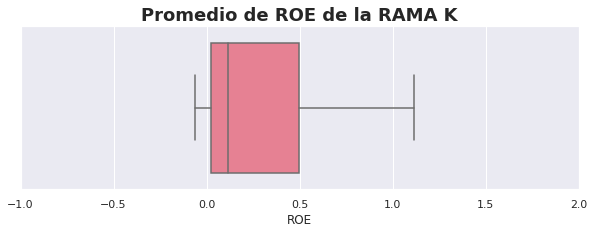

In [ ]:
sns.set(rc={'figure.figsize':(10,3)})
df_f1 = df[df['RAMA']=='K']
sns.boxplot(orient="h", palette="husl", x="ROE", data=df_f1)
plt.xlim(-1, 2)
plt.title("Promedio de ROE de la RAMA K", fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Mapa de Calor\nCorrelación - Indicadores y ROE\nRAMA K')

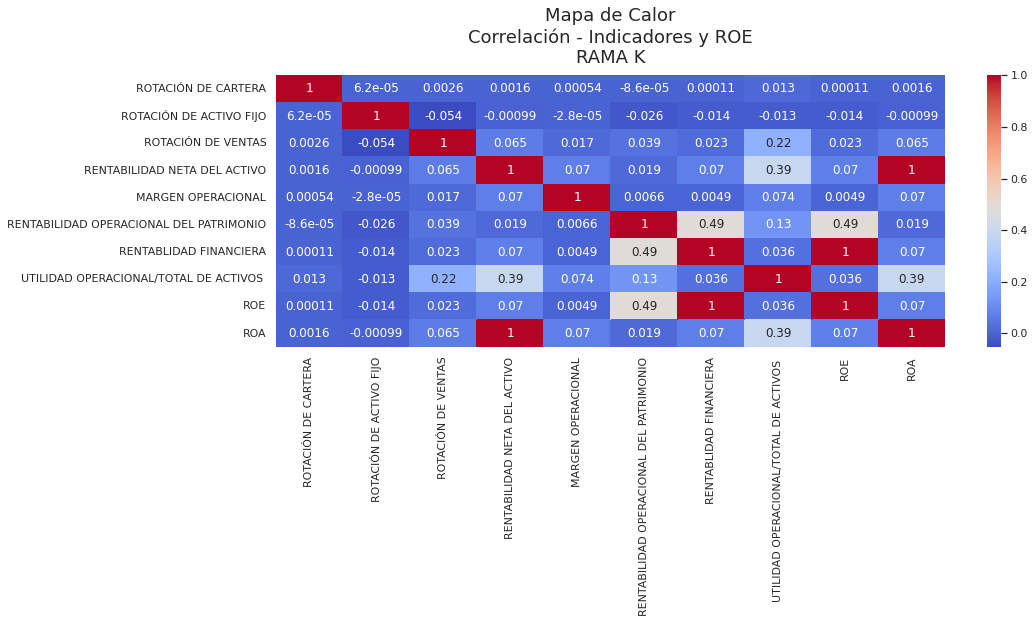

In [ ]:
corr_matrix = df_f1.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["ROE"])>0.4]
plt.figure(figsize=(15,5))
hm = sns.heatmap(df[top_corr_features].corr(),
                annot=True,
                cmap="coolwarm")
hm.set_title('Mapa de Calor\nCorrelación - Indicadores y ROE\nRAMA K', fontdict={'fontsize':18}, pad=12)

In [ ]:
df_LI = df[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL', 'ROE']] 

df_LI = df_LI[(df_LI['ROE'] > -1) & (df_LI['ROE'] < 1) & (df_LI['ROTACIÓN DE VENTAS'] < 10) & (df_LI['RENTABLIDAD FINANCIERA'] < 100) & 
              (df_LI['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -10) & (df_LI['RENTABILIDAD NETA DEL ACTIVO'] > -3) & (df_LI['MARGEN OPERACIONAL'] < 400)]

> ## **ANÁLISIS DE ROA POR RAMAS**

In [ ]:
print("Skewness: {}".format(df['ROA'].skew()))
print("Kurtosis: {}".format(df['ROA'].kurt()))
print("---------------------------")
print(df['ROA'].describe())

Skewness: -10.037858482005094
Kurtosis: 188.38766256816808
---------------------------
count    14308.000000
mean         0.011669
std          0.195766
min         -5.743858
25%          0.000330
50%          0.016086
75%          0.054652
max          1.161803
Name: ROA, dtype: float64


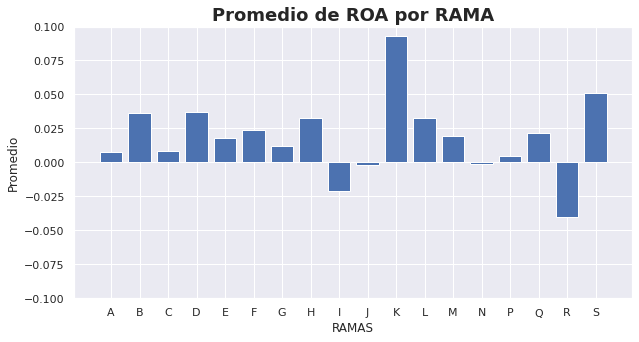

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
plt.bar(df.groupby('RAMA').mean()['ROA'].index, df.groupby('RAMA').mean()['ROA'], align='center')
plt.title("Promedio de ROA por RAMA", fontsize=18, fontweight='bold')
plt.xlabel("RAMAS")
plt.ylabel("Promedio")
plt.ylim(-0.1, 0.1)
plt.show()

Text(0.5, 1.0, 'Promedio de ROA de la RAMA K')

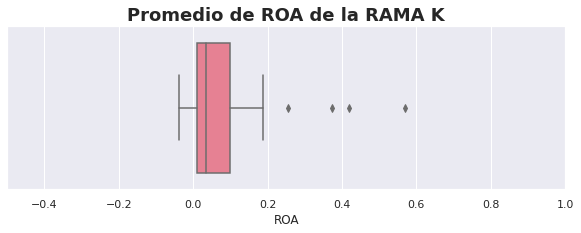

In [ ]:
sns.set(rc={'figure.figsize':(10,3)})
df_f2 = df[df['RAMA']=='K']
sns.boxplot(orient="h", palette="husl", x="ROA", data=df_f2)
plt.xlim(-0.5, 1)
plt.title("Promedio de ROA de la RAMA K", fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Mapa de Calor\nCorrelación - Indicadores y ROA\nRAMA K')

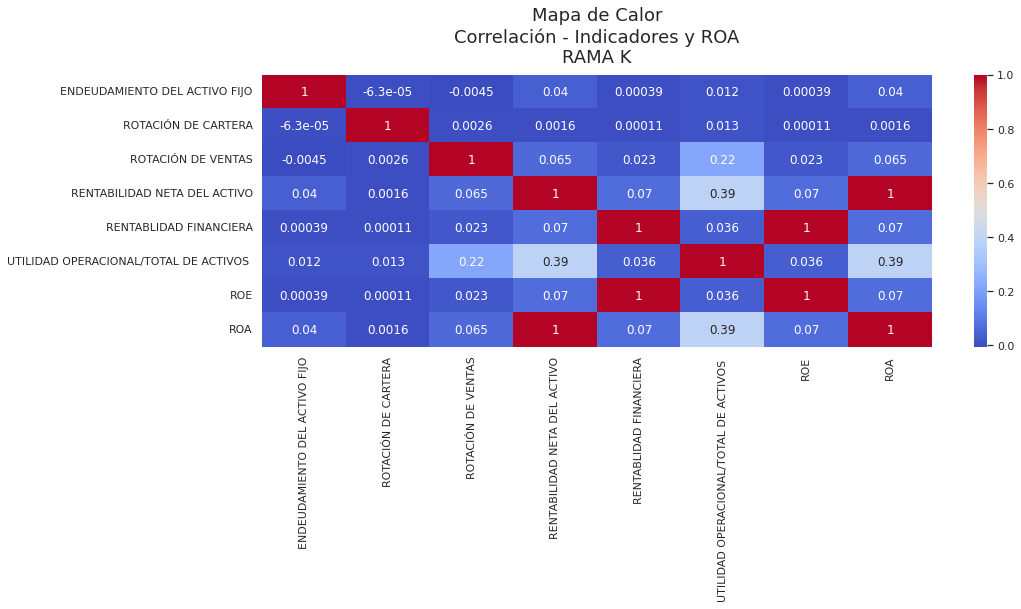

In [ ]:
corr_matrix = df_f2.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["ROA"])>0.4]
plt.figure(figsize=(15,5))
hm = sns.heatmap(df[top_corr_features].corr(),
                annot=True,
                cmap="coolwarm")
hm.set_title('Mapa de Calor\nCorrelación - Indicadores y ROA\nRAMA K', fontdict={'fontsize':18}, pad=12)

In [ ]:
df_LO = df[['ROA','DESCRIPCIÓN RAMA','RAMA','RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']]
df_LO = df_LO[(df_LO['ROA']>-1) & (df_LO['ROA'] < 1) & (df_LO['RENTABILIDAD NETA DEL ACTIVO'] < 500) & (df_LO['RENTABLIDAD FINANCIERA'] > -1) &
            (df_LO['ENDEUDAMIENTO A CORTO PLAZO'] > -5) & (df_LO['RENTABILIDAD NETA DE VENTAS'] < 150) & (df_LO['ROTACIÓN DE ACTIVO FIJO'] < 400)]


# **Modelo predictivo de regresión lineal del ROE**

In [ ]:
df_LI = df[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL', 'ROE']]
df_LI

,RENTABLIDAD FINANCIERA,ROTACIÓN DE VENTAS,RENTABILIDAD NETA DEL ACTIVO,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,MARGEN OPERACIONAL,ROE
ID,,,,,,
2,0.029656,0.671793,0.013612,0.051820,0.077136,0.029656
3,-0.046171,1.067048,-0.016565,-0.032901,-0.030833,-0.046171
5,0.058648,1.068332,0.016383,0.036057,0.033751,0.058648
8,-0.147701,0.576668,-0.031462,-0.030758,-0.053338,-0.147701
9,0.055154,1.113214,0.028136,0.359713,0.323131,0.055154
...,...,...,...,...,...,...
84796,0.556272,0.808590,0.031278,0.040117,0.049614,0.556272
84842,0.909427,0.712141,0.094858,0.362786,0.509430,0.909427
85220,0.567558,0.332708,0.000869,-0.010504,-0.031573,0.567558


In [ ]:
# Crear los arreglos con los inputs escogidos y el target del ROE
inputs = df_LI[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL']].values
targets = df_LI[['ROE']].values
print('Input #1: ', inputs[1], '\nTamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], '\nTamaño: ', targets.shape)

Input #1:  [-0.04617107  1.0670478  -0.01656493 -0.03290078 -0.03083346] 
Tamaño:  (14308, 5) 
Target #1:  [-0.04617106] 
Tamaño:  (14308, 1)


In [ ]:
# Normalizar los inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)
#targets = scaler.fit_transform(targets)

In [ ]:
# Cambiar el tipo de dato y crear tensores
X = torch.from_numpy(inputs.astype(np.float32))
Y = torch.from_numpy(targets.astype(np.float32))
n_samples, n_features = X.shape
print(n_samples,n_features)

14308 5


In [ ]:
#Separar datos de entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
dataset_train = TensorDataset(X_train, y_train)

In [ ]:
dataset_train[1:2]

(tensor([[ 0.0636, -0.3086,  0.3239,  0.6815,  0.0847]]), tensor([[0.8499]]))

In [ ]:
# Define la clase del modelo de regresión lineal
bs=64
train_loader = DataLoader(dataset_train,batch_size=bs,shuffle=True)

In [ ]:
class ModeloRegresionLineal(torch.nn.Module):
  def __init__(self):
    super(ModeloRegresionLineal, self).__init__()
    self.linear = torch.nn.Linear(n_features, 1)  #X @ w.t() + b

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

In [ ]:
# Define los epochs, learning rate, función de costo y el optimizador
epochs = 30
ta = 1e-9 # Tasa Aprendizaje

model_rl = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.SGD(model_rl.parameters(), lr = ta) #Actualiza los pesos w y el bias b 

for i in range(epochs):
  for x,y in train_loader:
    preds = model_rl(x)
    loss = funcion_costo(preds, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 0.4285448491573334
Epoch 1/30: Loss 0.5946487188339233
Epoch 2/30: Loss 9.31455135345459
Epoch 3/30: Loss 0.7426868081092834
Epoch 4/30: Loss 10.14592170715332
Epoch 5/30: Loss 25.704723358154297
Epoch 6/30: Loss 0.7936495542526245
Epoch 7/30: Loss 0.10126297920942307
Epoch 8/30: Loss 0.40750259160995483
Epoch 9/30: Loss 31140.6796875
Epoch 10/30: Loss 1.6037739515304565
Epoch 11/30: Loss 20.511751174926758
Epoch 12/30: Loss 0.6074812412261963
Epoch 13/30: Loss 31209.27734375
Epoch 14/30: Loss 1.6176172494888306
Epoch 15/30: Loss 0.7412094473838806
Epoch 16/30: Loss 0.18564684689044952
Epoch 17/30: Loss 9.77913761138916
Epoch 18/30: Loss 0.24114887416362762
Epoch 19/30: Loss 10.19513988494873
Epoch 20/30: Loss 31141.203125
Epoch 21/30: Loss 0.7967230677604675
Epoch 22/30: Loss 0.42710018157958984
Epoch 23/30: Loss 0.18356266617774963
Epoch 24/30: Loss 25.105409622192383
Epoch 25/30: Loss 0.3895787000656128
Epoch 26/30: Loss 0.833349883556366
Epoch 27/30: Loss 0.4955005

In [ ]:
model_rl.linear.weight #w

Parameter containing:
tensor([[-0.0520,  0.2914,  0.0371,  0.3173,  0.0278]], requires_grad=True)

In [ ]:
model_rl.linear.bias #b

Parameter containing:
tensor([-0.0073], requires_grad=True)

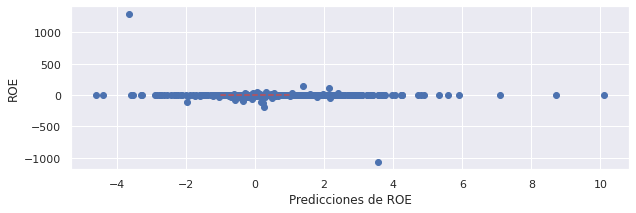


DATOS DEL AÑO 2019:
MAE: 0.8424941301345825
MSE: 261.9762268066406
RMSE: 16.185680389404297


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = []
y_true = []
model_rl.train(False)
for inputs, targets in train_loader:
  y_pred.extend(model_rl(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('Predicciones de ROE')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nDATOS DEL AÑO 2019:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

## ***PREDICCION POR CATEGORIAS DE AÑO 2019***

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


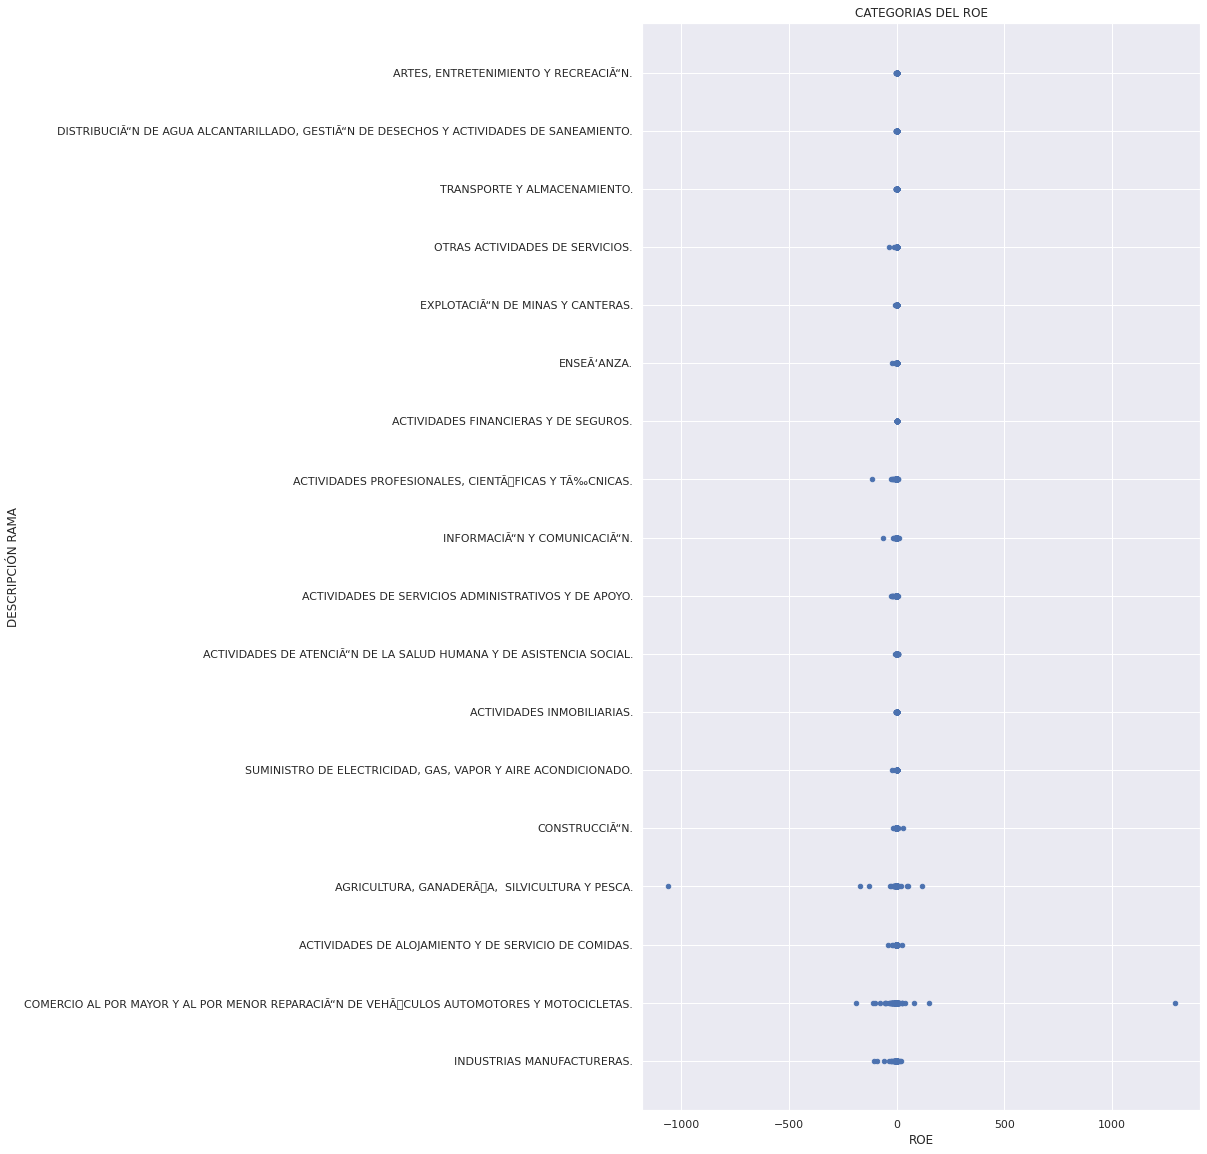

In [ ]:
df.plot.scatter(x='ROE',y= 'DESCRIPCIÓN RAMA', figsize=(10,20),title="CATEGORIAS DEL ROE")

In [ ]:
import glob
import os

def CATEGORIAS_LI():


  categ =  df[['RAMA']].values
  df['RAMA'] = categ
  metrics = {"DESCRIPCIÓN": [], "MAE": [], "MSE": [], "RMSE": []}
  grouped =  df.groupby("RAMA")
  for categoria, group in grouped:
      X_Lnl = group[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL']].values
      Y_Lnl = group[['ROE']].values
      # Escalando
      scaler = StandardScaler()
      inputs = scaler.fit_transform(X_Lnl)
      X_Lnl = torch.from_numpy(inputs.astype(np.float32))
      Y_Lnl = torch.from_numpy(Y_Lnl.astype(np.float32))
      dataset_test = TensorDataset(X_Lnl, Y_Lnl)
      test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
      # Evaluando el modelo
      y_pred = []
      y_true = []
      model_rl.train(False)
      for inputs, targets in test_loader:
        y_pred.extend(model_rl(inputs).data.numpy())
        y_true.extend(targets.numpy())
      # Calculando Errores
      mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
      mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
      rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
      metrics["DESCRIPCIÓN"].append(categoria)
      metrics["MAE"].append(mae)
      metrics["MSE"].append(mse)
      metrics["RMSE"].append(rmse)
          
  metrics_df = pd.DataFrame(metrics)
  metrics_df = metrics_df.sort_values("MSE")
  print("LAS CATEGORIAS MAYORES ERRORES :")
  print(metrics_df.tail(8))
  print("LAS CATEGORIAS MENORES ERRORES :")
  print(metrics_df.head(8))

In [ ]:
CATEGORIAS_LI()

LAS CATEGORIAS MAYORES ERRORES :
   DESCRIPCIÓN       MAE         MSE       RMSE
13           N  0.767580    6.006226   2.450760
2            C  0.639846    9.715785   3.117015
9            J  0.720340   10.789764   3.284778
14           P  1.116344   11.688409   3.418832
17           S  0.858742   13.774165   3.711356
12           M  0.788759   20.722900   4.552241
6            G  0.869720  275.378662  16.594538
0            A  1.579000  747.573303  27.341787
LAS CATEGORIAS MENORES ERRORES :
   DESCRIPCIÓN       MAE       MSE      RMSE
10           K  0.215334  0.090012  0.300020
7            H  0.312487  0.180658  0.425039
11           L  0.318897  0.188932  0.434664
4            E  0.412937  0.277002  0.526310
16           R  0.503054  0.362741  0.602280
1            B  0.400449  0.498010  0.705698
15           Q  0.481493  0.735337  0.857518
5            F  0.424011  1.249428  1.117778


## ***PREDICCIONES POR AÑOS***

## ***2019***

In [ ]:
x_2019 = torch.from_numpy(np.array([[-0.04617107, 1.0670478, -0.01656493, -0.03290078, -0.03083346]],
  dtype='float32'))
y_2019 = model_rl(x_2019) #predicción
print(y_2019)

tensor([[0.2942]], grad_fn=<AddmmBackward0>)


In [ ]:
x_2019 = torch.from_numpy(np.array([[-0.04617107, 1.0670478, -0.01656493, -0.03290078, -0.03083346]], 
  dtype='float32'))
y_2019 = model_rl(x_2019) #predicción
print(y_2019.mean())
print('prediccion media : ',y_2019.mean())
print('prediccion maxima : ',y_2019.max())
print('prediccion minima : ',y_2019.min())

tensor(0.2942, grad_fn=<MeanBackward0>)
prediccion media :  tensor(0.2942, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(0.2942, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(0.2942, grad_fn=<MinBackward1>)


## ***2017***

In [ ]:
df_LI_2017 = pd.read_excel("/content/drive/MyDrive/datasets/IA/indicadores2017_cia.xlsx")
df_LI_2017.fillna(0)
df_LI_2017.dropna(inplace=True)

In [ ]:
#Remover Outliers
df_LI_2017 = df_LI_2017[(df_LI_2017['ROE'] > -1) & (df_LI_2017['ROE'] < 1) & (df_LI_2017['ROTACIÓN DE VENTAS'] < 10) & (df_LI_2017['RENTABLIDAD FINANCIERA'] < 100) & 
              (df_LI_2017['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -10) & (df_LI_2017['RENTABILIDAD NETA DEL ACTIVO'] > -3) & (df_LI_2017['MARGEN OPERACIONAL'] < 400)]

dfsX_2017 = df_LI_2017[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL']].values
dfsY_2017 = df_LI_2017[['ROE']].values


In [ ]:
# Crear los arreglos con los inputs escogidos y el target del ROE
inputs = df_LI_2017[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL']].values
targets = df_LI_2017[['ROE']].values
print('Input #1: ', inputs[1], '\nTamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], '\nTamaño: ', targets.shape)

Input #1:  [-0.13251807  0.87065369 -0.04194727 -0.06638302 -0.07624503] 
Tamaño:  (12014, 5) 
Target #1:  [-0.13251808] 
Tamaño:  (12014, 1)


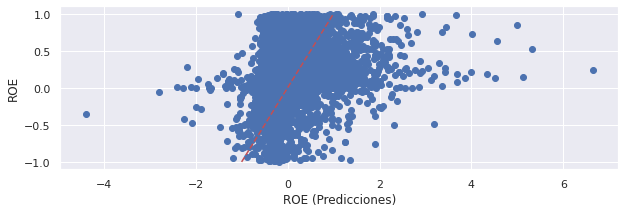


DATOS DEL AÑO 2017:
MAE: 0.3857935070991516
MSE: 0.27093786001205444
RMSE: 0.5205169320106506


In [ ]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfsX_2017)
inputs_rl = np.array(inputs, dtype='float32')
dY_2017 = np.array(dfsY_2017, dtype='float32')
from torch.utils.data import TensorDataset
X_2017 = torch.from_numpy(inputs_rl)
Y_2017 = torch.from_numpy(dY_2017)
dataset_test = TensorDataset(X_2017, Y_2017)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
 # Evaluando el modelo
y_pred = []
y_true = []
model_rl.train(False)
for inputs, targets in test_loader:
  y_pred.extend(model_rl(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nDATOS DEL AÑO 2017:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

In [ ]:
x_2017 = torch.from_numpy(np.array([[-0.13251807, 0.87065369, -0.04194727, -0.06638302, -0.07624503]], 
  dtype='float32'))
y_2017 = model_rl(x_2017) #predicción
print(y_2017)

tensor([[0.2286]], grad_fn=<AddmmBackward0>)


In [ ]:
x_2017 = torch.from_numpy(np.array([[dfsX_2017]], 
  dtype='float32'))
y_2017 = model_rl(x_2017) #predicción
print('prediccion media : ',y_2017.mean())
print('prediccion maxima : ',y_2017.max())
print('prediccion minima : ',y_2017.min())

prediccion media :  tensor(0.5960, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(5.2616, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-1.6719, grad_fn=<MinBackward1>)


## ***2018***

In [ ]:
df_LI_2018 = pd.read_excel("/content/drive/MyDrive/datasets/IA/indicadores2018_cia.xlsx")
df_LI_2018.fillna(0)
df_LI_2018.dropna(inplace=True)

In [ ]:
#Remover Outliers
df_LI_2018 = df_LI_2018[(df_LI_2018['ROE'] > -1) & (df_LI_2018['ROE'] < 1) & (df_LI_2018['ROTACIÓN DE VENTAS'] < 10) & (df_LI_2018['RENTABLIDAD FINANCIERA'] < 100) & 
              (df_LI_2018['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -10) & (df_LI_2018['RENTABILIDAD NETA DEL ACTIVO'] > -3) & (df_LI_2018['MARGEN OPERACIONAL'] < 400)]

dfsX_2018 = df_LI_2018[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL']].values
dfsY_2018 = df_LI_2018[['ROE']].values


In [ ]:
# Crear los arreglos con los inputs escogidos y el target del ROE
inputs = df_LI_2018[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL']].values
targets = df_LI_2018[['ROE']].values
print('Input #1: ', inputs[1], ' - Tamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], ' - Tamaño: ', targets.shape)

Input #1:  [0.05363422 1.108128   0.01739988 0.00379337 0.00342322]  - Tamaño:  (12751, 5) 
Target #1:  [0.05363422]  - Tamaño:  (12751, 1)


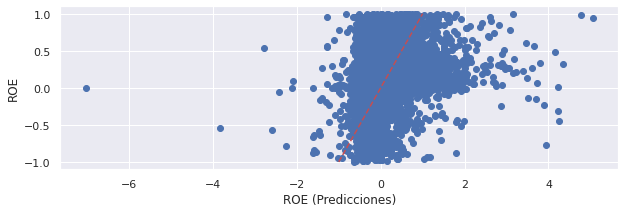


Datos del año 2018:
MAE: 0.3838843107223511
MSE: 0.2676955759525299
RMSE: 0.5173930525779724


In [ ]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfsX_2018)
inputs_rl = np.array(inputs, dtype='float32')
dY_2018 = np.array(dfsY_2018, dtype='float32')
from torch.utils.data import TensorDataset
X_2018 = torch.from_numpy(inputs_rl)
Y_2018 = torch.from_numpy(dY_2018)
dataset_test = TensorDataset(X_2018, Y_2018)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
 # Evaluando el modelo
y_pred = []
y_true = []
model_rl.train(False)
for inputs, targets in test_loader:
  y_pred.extend(model_rl(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nDatos del año 2018:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

In [ ]:
x_2018 = torch.from_numpy(np.array([[0.05363422, 1.108128,  0.01739988, 0.00379337, 0.00342322]], 
  dtype='float32'))
y_2018 = model_rl(x_2018) #predicción
print(y_2018)

tensor([[0.3148]], grad_fn=<AddmmBackward0>)


In [ ]:
x_2018 = torch.from_numpy(np.array([[dfsX_2018]], 
  dtype='float32'))
y_2018 = model_rl(x_2018) #predicción
print('prediccion media : ',y_2018.mean())
print('prediccion maxima : ',y_2018.max())
print('prediccion minima : ',y_2018.min())

prediccion media :  tensor(0.5829, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(9.4847, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-13.0738, grad_fn=<MinBackward1>)


## ***2020***

In [ ]:
df_LI_2020 = pd.read_excel("/content/drive/MyDrive/datasets/IA/indicadores2020_cia.xlsx")
df_LI_2020.fillna(0)
df_LI_2020.dropna(inplace=True)

In [ ]:
#Remover Outliers
df_LI_2020 = df_LI_2020[(df_LI_2020['ROE'] > -1) & (df_LI_2020['ROE'] < 1) & (df_LI_2020['ROTACIÓN DE VENTAS'] < 10) & (df_LI_2020['RENTABLIDAD FINANCIERA'] < 100) & 
              (df_LI_2020['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -10) & (df_LI_2020['RENTABILIDAD NETA DEL ACTIVO'] > -3) & (df_LI_2020['MARGEN OPERACIONAL'] < 400)]

dfsX_2020 = df_LI_2020[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL']].values
dfsY_2020 = df_LI_2020[['ROE']].values


In [ ]:
# Crear los arreglos con los inputs escogidos y el target del ROE
inputs = df_LI_2020[['RENTABLIDAD FINANCIERA', 'ROTACIÓN DE VENTAS', 'RENTABILIDAD NETA DEL ACTIVO', 'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', 'MARGEN OPERACIONAL']].values
targets = df_LI_2020[['ROE']].values
print('Input #1: ', inputs[1], ' - Tamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], ' - Tamaño: ', targets.shape)

Input #1:  [-0.08051773  0.85084701 -0.02910098 -0.04367799 -0.05133472]  - Tamaño:  (12591, 5) 
Target #1:  [-0.08051773]  - Tamaño:  (12591, 1)


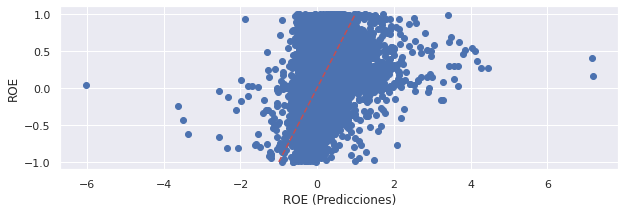


Datos del año 2018:
MAE: 0.3546716272830963
MSE: 0.24474889039993286
RMSE: 0.49472102522850037


In [ ]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfsX_2020)
inputs_rl = np.array(inputs, dtype='float32')
dY_2020 = np.array(dfsY_2020, dtype='float32')
from torch.utils.data import TensorDataset
X_2020 = torch.from_numpy(inputs_rl)
Y_2020 = torch.from_numpy(dY_2020)
dataset_test = TensorDataset(X_2020, Y_2020)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
 # Evaluando el modelo
y_pred = []
y_true = []
model_rl.train(False)
for inputs, targets in test_loader:
  y_pred.extend(model_rl(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nDatos del año 2018:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

In [ ]:
x_2020 = torch.from_numpy(np.array([[-0.08051773, 0.85084701, -0.02910098, -0.04367799, -0.05133472]], 
  dtype='float32'))
y_2020 = model_rl(x_2020) #predicción
print(y_2020)

tensor([[0.2285]], grad_fn=<AddmmBackward0>)


In [ ]:
x_2020 = torch.from_numpy(np.array([[dfsX_2020]], 
  dtype='float32'))
y_2020 = model_rl(x_2018) #predicción
print('prediccion media : ',y_2020.mean())
print('prediccion maxima : ',y_2020.max())
print('prediccion minima : ',y_2020.min())

prediccion media :  tensor(0.5829, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(9.4847, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-13.0738, grad_fn=<MinBackward1>)


# **Modelo predictivo de Regresión logística del ROA**

In [ ]:
inputs = df_LO[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
targets = df_LO[['ROA']].values
print('Input #1: ', inputs[1], '\nTamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], '\nTamaño: ', targets.shape)

Input #1:  [-1.6564935e-02 -4.6171069e-02 -1.5524080e-02  2.4994294e-01
  2.3307087e+01] 
Tamaño:  (13003, 5) 
Target #1:  [-0.01656493] 
Tamaño:  (13003, 1)


In [ ]:
x = df_LO[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']]
y = df_LO[['ROA']]

In [ ]:
y['ROA_DIS'] = pd.qcut(y['ROA'], 5, labels=False)
y['ROA_DESCRIPCION'] = pd.qcut(y['ROA_DIS'], 4, labels=["MALO","REGULAR", "BUENO", "EXCELENTE"])
y

<ipython-input-197-79d5b338a014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['ROA_DIS'] = pd.qcut(y['ROA'], 5, labels=False)
<ipython-input-197-79d5b338a014>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['ROA_DESCRIPCION'] = pd.qcut(y['ROA_DIS'], 4, labels=["MALO","REGULAR", "BUENO", "EXCELENTE"])


,ROA,ROA_DIS,ROA_DESCRIPCION
ID,,,
2,0.013612,2,REGULAR
3,-0.016565,0,MALO
5,0.016383,2,REGULAR
8,-0.031462,0,MALO
9,0.028136,2,REGULAR
...,...,...,...
84796,0.031278,3,BUENO
84842,0.094858,4,EXCELENTE
85220,0.000869,1,MALO


In [ ]:
Y = y[['ROA_DIS']]
Y

,ROA_DIS
ID,
2,2
3,0
5,2
8,0
9,2
...,...
84796,3
84842,4
85220,1


In [ ]:
X= np.array(x, dtype='float32')
Y1= Y['ROA_DIS'].values

In [ ]:
print('tamaño de X INDICADORES : ',X.shape) #tamaño de X INDICADORES 
print('tamaño de Y ROE : ',Y1.shape) #tamaño de dY ROA

tamaño de X INDICADORES :  (13003, 5)
tamaño de Y ROE :  (13003,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y1,test_size=0.25)

In [ ]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.int64))
y_test = torch.from_numpy(y_test.astype(np.int64))

In [ ]:
class LR_Model(torch.nn.Module):
  def __init__(self, n_features):
    super(LR_Model,self).__init__()
    self.logt  = torch.nn.Linear(n_features, 5)
    self.softmax = torch.nn.Softmax(dim=1)

  def forward(self, x):
    y_hat = torch.sigmoid(self.logt(x)) #regresión logistica necesita la función sigmoid
    return y_hat

In [ ]:
#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, loss_test, acc):
  plt.figure(figsize=(10,5))
  xlim = len(loss)
  plt.plot(epochs,loss)
  plt.plot(epochs,loss_test)
  plt.plot(epochs,acc)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Test loss','Accuracy'),loc='center right',shadow=True)
  plt.title('Train and Test Loss vs Accuracy')


In [ ]:
#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
  #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  loss_test_vals = []
  acc_vals = []
  epoch_vals = []

  #entrenamiento
  for epoch in range(num_epochs):
    y_hat = model(x_train)
    loss = cost(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%5 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_hat_test = model(x_test)  #se usan los datos de prueba para evaluar el modelo
        loss_test = cost(y_hat_test, y_test)
        loss_test_vals.append(loss_test.item())
        y_hat_class = y_hat_test.argmax(dim=1) #se redondea para saber si la clase es 1 o 0, recordar que sigmoid devuelve valor entre 0 y 1
        accuracy = (y_hat_class.eq(y_test).sum())/float(y_hat_test.shape[0]) #se cuenta las correctas y se divide para el total de datos de prueba
        acc_vals.append(accuracy.item())
        epoch_vals.append(epoch)
      print(f'epoch:{epoch+1} loss={loss.item()} loss_test={loss_test.item()} accuracy={accuracy.item()}')
  plot_loss(epoch_vals,loss_vals,loss_test_vals,acc_vals)   

In [ ]:
print(x_train[1])
print(y_train[1])

tensor([ 0.0806, -0.0064,  0.0378,  0.9632,  0.0169])
tensor(3)


epoch:5 loss=1.6387180089950562 loss_test=1.632010817527771 accuracy=0.20855121314525604
epoch:10 loss=1.62864089012146 loss_test=1.6209782361984253 accuracy=0.21408797800540924
epoch:15 loss=1.6185014247894287 loss_test=1.6098616123199463 accuracy=0.21839433908462524
epoch:20 loss=1.608323574066162 loss_test=1.598886489868164 accuracy=0.25315287709236145
epoch:25 loss=1.5984264612197876 loss_test=1.5884546041488647 accuracy=0.32328513264656067
epoch:30 loss=1.5888850688934326 loss_test=1.5784411430358887 accuracy=0.33343586325645447
epoch:35 loss=1.5797988176345825 loss_test=1.568900465965271 accuracy=0.33374345302581787
epoch:40 loss=1.5712820291519165 loss_test=1.5599873065948486 accuracy=0.31621038913726807
epoch:45 loss=1.5633301734924316 loss_test=1.5516952276229858 accuracy=0.31990155577659607
epoch:50 loss=1.555988073348999 loss_test=1.5440019369125366 accuracy=0.33035987615585327
epoch:55 loss=1.5492522716522217 loss_test=1.5368732213974 accuracy=0.3512765169143677
epoch:60 lo

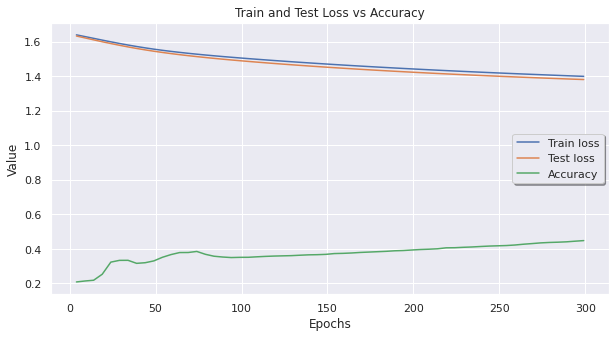

In [ ]:
n_features = X.shape[1] #en este caso 30 features
lr_model = LR_Model(n_features)
costo =  torch.nn.CrossEntropyLoss()  
optim = torch.optim.Adam(lr_model.parameters(),lr=0.01) #gradiente descendente
train(num_epochs=300, optimizer=optim, cost=costo, model=lr_model)

In [ ]:
print(x_test[1])

tensor([-0.2242, -0.1057,  0.0286,  0.9980,  0.0176])


In [ ]:
features = [-1.6564935e-02, -4.6171069e-02, -1.5524080e-02,  2.4994294e-01, 2.3307087e+01]
y_prueba = lr_model(x_test)
etiquetas = y_prueba.argmax(dim=1)
print(etiquetas)

tensor([2, 2, 3,  ..., 1, 2, 1])


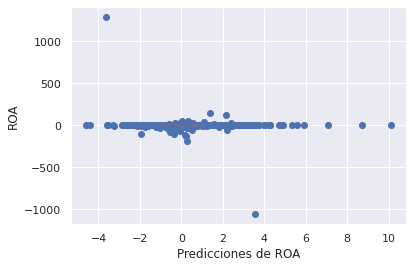


DATOS DEL AÑO 2019:
MAE: 0.8424941301345825
MSE: 261.9762268066406
Accuracy: 2619.76%


In [ ]:
# Evaluando el modelo 2019
y_pred = []
y_true = []
model_rl.train(False)
for inputs, targets in train_loader:
  y_pred.extend(model_rl(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROA')
plt.xlabel('Predicciones de ROA')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nDATOS DEL AÑO 2019:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print('Accuracy: {:.2f}%'.format(mse*10))


## ***PREDICCION POR CATEGORIAS DE AÑO 2019***

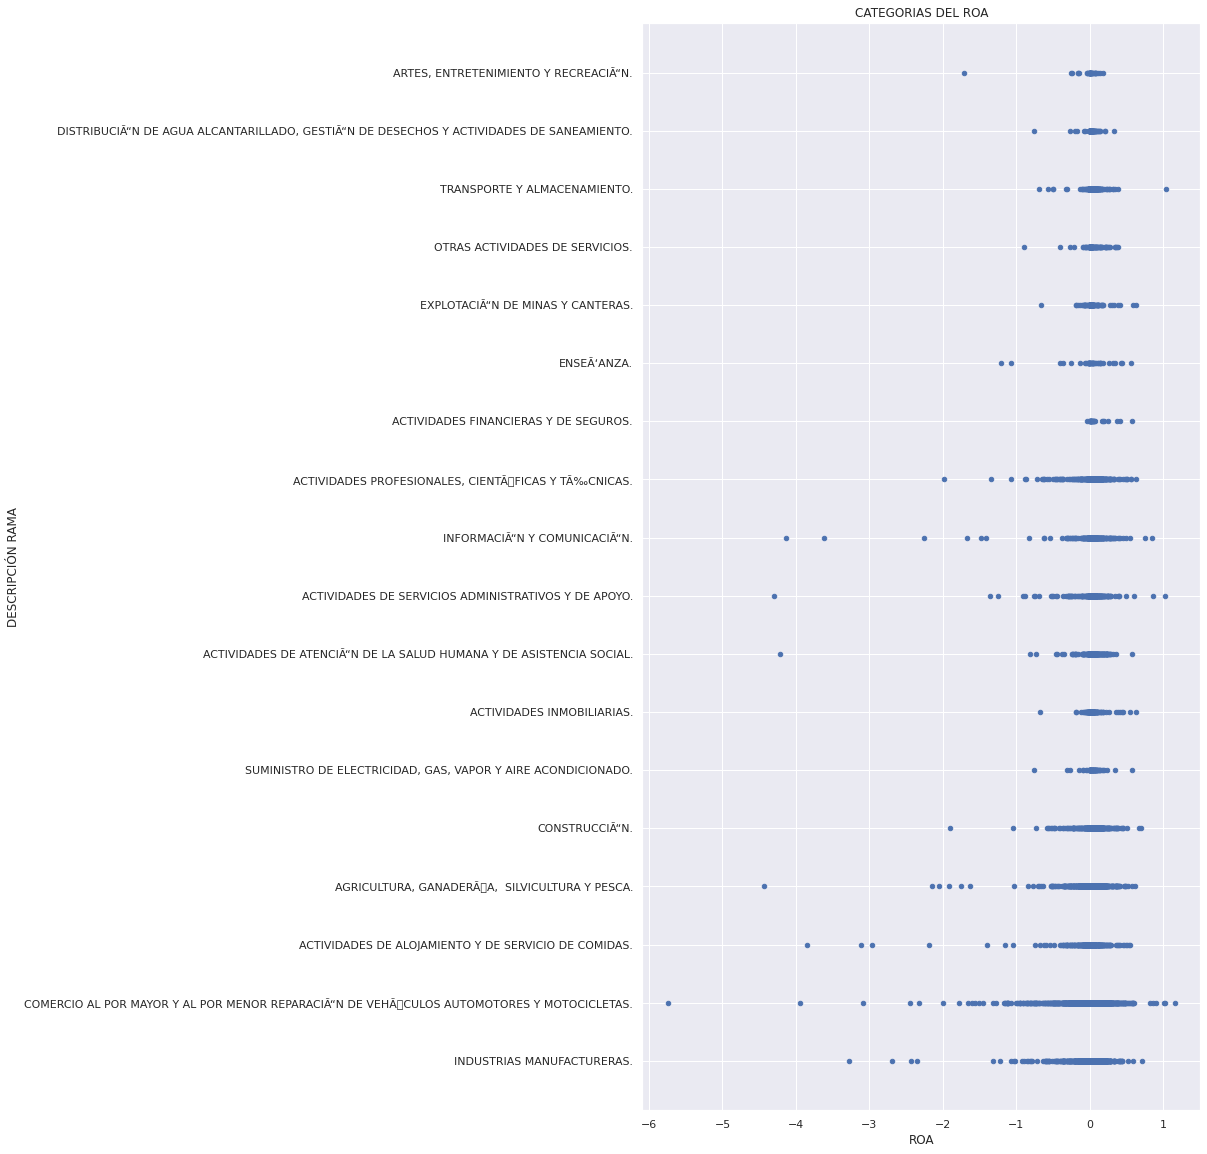

In [ ]:
df.plot.scatter(x='ROA',y= 'DESCRIPCIÓN RAMA', figsize=(10,20),title="CATEGORIAS DEL ROA")

In [ ]:
import glob
import os
def CATEGORIAS_LO():
  df ['ROA_DIS'] = pd.qcut(df['ROA'], 4, labels=False)
  categ =  df[['RAMA']].values
  df['RAMA'] = categ
  metrics = {"DESCRIPCIÓN": [],  "MSE": [], "RMSE": [],"ACC": []}
  grouped =  df.groupby("RAMA")
  for categoria, group in grouped:
      X_rlg = group[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
      Y_rlg = group[['ROA_DIS']].values
      # Escalando
      scaler = StandardScaler()
      inputs = scaler.fit_transform(X_rlg)
      X_rlg = torch.from_numpy(inputs.astype(np.float32))
      Y_rlg = torch.from_numpy(Y_rlg.astype(np.int64))
      dataset_test = TensorDataset(X_rlg, Y_rlg)
      test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
      # Evaluando el modelo
      y_pred = []
      y_true = []
      lr_model.train(False)
      for inputs, targets in test_loader:
        y_hat_test = lr_model(inputs).data.numpy()
        y_hat_class = np.argmax(y_hat_test, axis=1)
        y_pred.extend(y_hat_class)
        y_true.extend(targets.numpy())
      # Calculando Errores
      mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
      rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
      acc = accuracy_score(y_true, y_pred)
      metrics["DESCRIPCIÓN"].append(categoria)
      metrics["MSE"].append(mse)
      metrics["RMSE"].append(rmse)
      metrics["ACC"].append(acc)
  metrics_df = pd.DataFrame(metrics)
  metrics_df = metrics_df.sort_values("MSE")
  print("LAS CATEGORIAS MAYORES ERRORES :")
  print(metrics_df.tail(8))
  print("LAS CATEGORIAS MENORES ERRORES :")
  print(metrics_df.head(8))


In [ ]:
CATEGORIAS_LO()

LAS CATEGORIAS MAYORES ERRORES :
   DESCRIPCIÓN       MSE      RMSE       ACC
6            G  1.450767  1.204478  0.295876
9            J  1.748031  1.322131  0.330709
2            C  1.767623  1.329520  0.255328
0            A  1.901597  1.378984  0.273482
13           N  2.011019  1.418104  0.330579
14           P  2.133333  1.460593  0.355556
8            I  2.486438  1.576844  0.233273
16           R  2.536585  1.592666  0.317073
LAS CATEGORIAS MENORES ERRORES :
   DESCRIPCIÓN       MSE      RMSE       ACC
10           K  0.392857  0.626783  0.714286
7            H  0.711409  0.843451  0.489933
3            D  0.814286  0.902378  0.485714
11           L  0.815668  0.903144  0.419355
17           S  0.824742  0.908153  0.577320
15           Q  0.841121  0.917127  0.514019
5            F  1.130273  1.063143  0.349876
4            E  1.197531  1.094318  0.320988


## ***PREDICCIONES POR AÑOS***

## ***2019***

In [ ]:
X_LOG_2019 = torch.from_numpy(np.array([[-1.6564935e-02, -4.6171069e-02, -1.5524080e-02,  2.4994294e-01, 2.3307087e+01]], 
  dtype='float32'))
Y_LOG_2019 = model_rl(X_LOG_2019) #predicción
print(Y_LOG_2019)

tensor([[0.7059]], grad_fn=<AddmmBackward0>)


In [ ]:
x_LO_2019 = torch.from_numpy(np.array([[inputs]], 
  dtype='float32'))
y_LOG_2019 = model_rl(x_LO_2019) #predicción
print('prediccion media : ',y_LOG_2019.mean())
print('prediccion maxima : ',y_LOG_2019.max())
print('prediccion minima : ',y_LOG_2019.min())

prediccion media :  tensor(-1.3777e+13, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(48.6831, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-1.6038e+17, grad_fn=<MinBackward1>)


## ***2017***

In [ ]:
df_LO_2017 = pd.read_excel("/content/drive/MyDrive/datasets/IA/indicadores2017_cia.xlsx", index_col=0)
df_LO_2017.fillna(0)
df_LO_2017.dropna(inplace=True)

In [ ]:
#Remover Outliers
df1_LO_2017 = df_LO_2017[(df_LO_2017['ROA']>-1) & (df_LO_2017['ROA'] < 1) & (df_LO_2017['RENTABILIDAD NETA DEL ACTIVO'] < 500) & (df_LO_2017['RENTABLIDAD FINANCIERA'] > -1) &
            (df_LO_2017['ENDEUDAMIENTO A CORTO PLAZO'] > -5) & (df_LO_2017['RENTABILIDAD NETA DE VENTAS'] < 150) & (df_LO_2017['ROTACIÓN DE ACTIVO FIJO'] < 400)]
            
X_LO_2017 = df1_LO_2017[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
Y_LO_2017 = df1_LO_2017[['ROA']]
Y_LO_2017['ROA_DIS'] = pd.qcut(Y_LO_2017['ROA'], 5, labels=False)
Y2_LO_2017 = Y_LO_2017[['ROA_DIS']]


<ipython-input-286-eb8d98a7b5e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_LO_2017['ROA_DIS'] = pd.qcut(Y_LO_2017['ROA'], 5, labels=False)


In [ ]:
inputs = df1_LO_2017[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
targets = df1_LO_2017[['ROA']].values
print('Input #1: ', inputs[1], '\nTamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], '\nTamaño: ', targets.shape)

Input #1:  [-0.04194727 -0.13251807 -0.04817906  0.26522911 13.475732  ] 
Tamaño:  (11947, 5) 
Target #1:  [-0.04194728] 
Tamaño:  (11947, 1)


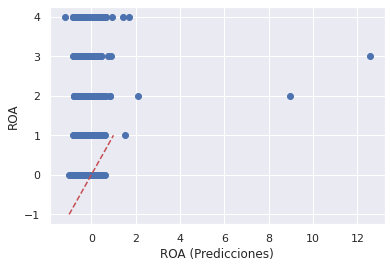


Resultados Del año 2017 datos:
MAE: 2.0960259307892994
MSE: 6.220399598870354
Accuracy: 62.20%


In [ ]:
X_2017= np.array(X_LO_2017, dtype='float32')
Y_2017= Y2_LO_2017['ROA_DIS'].values
x_train, x_test, y_train, y_test = train_test_split(X_2017,Y_2017,test_size = 0.25)
# SCALER
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#
x_test_2017 = torch.from_numpy(x_test.astype(np.float32))
## describir nuevo paso - numero enteros 
y_test_2017 = torch.from_numpy(y_test.astype(np.int64))
dataset_test = TensorDataset(x_test_2017, y_test_2017)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)

 # Evaluando el modelo
y_pred = []
y_true = []
model_rl.train(False)
for inputs, targets in test_loader:
  y_pred.extend(model_rl(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROA')
plt.xlabel('ROA (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2017 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print('Accuracy: {:.2f}%'.format(mse*10))

In [ ]:
X_LO_2017 = torch.from_numpy(np.array([[-0.04194727, -0.13251807, -0.04817906, 0.26522911, 13.475732]], 
  dtype='float32'))
Y_LOG_2017 = model_rl(X_LO_2017) #predicción
print(Y_LOG_2017)

y_prueba_2017 = lr_model(x_test_2017)
etiquetas_2017 = y_prueba_2017.argmax(dim=1)
print(etiquetas_2017)

tensor([[0.4128]], grad_fn=<AddmmBackward0>)
tensor([2, 2, 1,  ..., 2, 3, 3])


In [ ]:
x_LO_2017 = torch.from_numpy(np.array([[inputs]], dtype='float32'))
y_LOG_2017 = model_rl(x_LO_2017) #predicción
print('prediccion media : ',y_LOG_2017.mean())
print('prediccion maxima : ',y_LOG_2017.max())
print('prediccion minima : ',y_LOG_2017.min())

prediccion media :  tensor(-1.7999e+12, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(96.0370, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-1.0208e+16, grad_fn=<MinBackward1>)


## ***2018***

In [ ]:
df_LO_2018 = pd.read_excel("/content/drive/MyDrive/datasets/IA/indicadores2018_cia.xlsx", index_col=0)
df_LO_2018.fillna(0)
df_LO_2018.dropna(inplace=True)

In [ ]:
#Remover Outliers
df1_LO_2018 = df_LO_2018[(df_LO_2018['ROA']>-1) & (df_LO_2018['ROA'] < 1) & (df_LO_2018['RENTABILIDAD NETA DEL ACTIVO'] < 500) & (df_LO_2018['RENTABLIDAD FINANCIERA'] > -1) &
            (df_LO_2018['ENDEUDAMIENTO A CORTO PLAZO'] > -5) & (df_LO_2018['RENTABILIDAD NETA DE VENTAS'] < 150) & (df_LO_2018['ROTACIÓN DE ACTIVO FIJO'] < 400)]
            
X_LO_2018 = df1_LO_2018[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
Y_LO_2018 = df1_LO_2018[['ROA']]
Y_LO_2018['ROA_DIS'] = pd.qcut(Y_LO_2018['ROA'], 5, labels=False)
Y2_LO_2018 = Y_LO_2018[['ROA_DIS']]


<ipython-input-294-e71f3d476647>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_LO_2018['ROA_DIS'] = pd.qcut(Y_LO_2018['ROA'], 5, labels=False)


In [ ]:
inputs = df1_LO_2018[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
targets = df1_LO_2018[['ROA']].values
print('Input #1: ', inputs[1], '\nTamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], '\nTamaño: ', targets.shape)

Input #1:  [1.7399877e-02 5.3634219e-02 1.5702046e-02 4.4583824e-01 2.3272505e+01] 
Tamaño:  (12652, 5) 
Target #1:  [0.01739987] 
Tamaño:  (12652, 1)


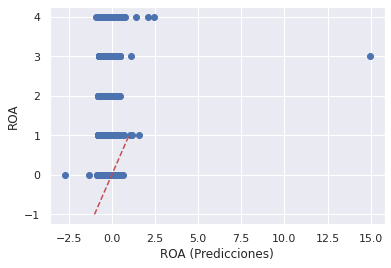


Datos del año 2018:
MAE: 2.0657072362937257
MSE: 6.052954244478889
Accuracy: 60.53%


In [ ]:
X_2018= np.array(X_LO_2018, dtype='float32')
Y_2018= Y2_LO_2018['ROA_DIS'].values
x_train, x_test, y_train, y_test = train_test_split(X_2018,Y_2018,test_size = 0.25)
# SCALER
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#
x_test_2018 = torch.from_numpy(x_test.astype(np.float32))
## describir nuevo paso - numero enteros 
y_test_2018 = torch.from_numpy(y_test.astype(np.int64))
dataset_test = TensorDataset(x_test_2018, y_test_2018)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)

 # Evaluando el modelo
y_pred = []
y_true = []
model_rl.train(False)
for inputs, targets in test_loader:
  y_pred.extend(model_rl(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROA')
plt.xlabel('ROA (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nDatos del año 2018:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print('Accuracy: {:.2f}%'.format(mse*10))

In [ ]:
X_LO_2018 = torch.from_numpy(np.array([[1.7399877e-02, 5.3634219e-02, 1.5702046e-02, 4.4583824e-01, 2.3272505e+01]], 
  dtype='float32'))
Y_LOG_2018 = model_rl(X_LO_2018) #predicción
print(Y_LOG_2018)

y_prueba_2018 = lr_model(x_test_2018)
etiquetas_2018 = y_prueba_2018.argmax(dim=1)
print(etiquetas_2018)

tensor([[0.7956]], grad_fn=<AddmmBackward0>)
tensor([2, 1, 1,  ..., 3, 2, 1])


In [ ]:
x_LO_2018 = torch.from_numpy(np.array([[inputs]], dtype='float32'))
y_LOG_2018 = model_rl(x_LO_2018) #predicción
print('prediccion media : ',y_LOG_2018.mean())
print('prediccion maxima : ',y_LOG_2018.max())
print('prediccion minima : ',y_LOG_2018.min())

prediccion media :  tensor(-1.6676e+12, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(61.3546, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-1.1621e+16, grad_fn=<MinBackward1>)


## ***2020***

In [ ]:
df_LO_2020 = pd.read_excel("/content/drive/MyDrive/datasets/IA/indicadores2020_cia.xlsx", index_col=0)
df_LO_2020.fillna(0)
df_LO_2020.dropna(inplace=True)

In [ ]:
#Remover Outliers
df1_LO_2020 = df_LO_2020[(df_LO_2020['ROA']>-1) & (df_LO_2020['ROA'] < 1) & (df_LO_2020['RENTABILIDAD NETA DEL ACTIVO'] < 500) & (df_LO_2020['RENTABLIDAD FINANCIERA'] > -1) &
            (df_LO_2020['ENDEUDAMIENTO A CORTO PLAZO'] > -5) & (df_LO_2020['RENTABILIDAD NETA DE VENTAS'] < 150) & (df_LO_2020['ROTACIÓN DE ACTIVO FIJO'] < 400)]
            
X_LO_2020 = df1_LO_2020[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
Y_LO_2020 = df1_LO_2020[['ROA']]
Y_LO_2020['ROA_DIS'] = pd.qcut(Y_LO_2020['ROA'], 5, labels=False)
Y2_LO_2020 = Y_LO_2020[['ROA_DIS']]

<ipython-input-301-6072f85a7925>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_LO_2020['ROA_DIS'] = pd.qcut(Y_LO_2020['ROA'], 5, labels=False)


In [ ]:
inputs = df1_LO_2020[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',  'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
targets = df1_LO_2020[['ROA']].values
print('Input #1: ', inputs[1], '\nTamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], '\nTamaño: ', targets.shape)

Input #1:  [-0.02910098 -0.08051773 -0.03420236  0.2134347  20.622047  ] 
Tamaño:  (12445, 5) 
Target #1:  [-0.02910098] 
Tamaño:  (12445, 1)


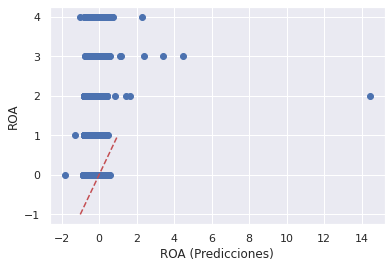


DATOS DEL AÑO 2020:
MAE: 2.0930176297373886
MSE: 6.181234990097467
Accuracy: 61.81%


In [ ]:
X_2020= np.array(X_LO_2020, dtype='float32')
Y_2020= Y2_LO_2020['ROA_DIS'].values
x_train, x_test, y_train, y_test = train_test_split(X_2020,Y_2020,test_size = 0.25)
# SCALER
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#
x_test_2020 = torch.from_numpy(x_test.astype(np.float32))
## describir nuevo paso - numero enteros 
y_test_2020 = torch.from_numpy(y_test.astype(np.int64))
dataset_test = TensorDataset(x_test_2020, y_test_2020)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)

 # Evaluando el modelo
y_pred = []
y_true = []
model_rl.train(False)
for inputs, targets in test_loader:
  y_pred.extend(model_rl(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROA')
plt.xlabel('ROA (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nDATOS DEL AÑO 2020:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print('Accuracy: {:.2f}%'.format(mse*10))

In [ ]:
X_LO_2020 = torch.from_numpy(np.array([[-0.02910098, -0.08051773, -0.03420236,  0.2134347,  20.622047]], 
  dtype='float32'))
Y_LOG_2020 = model_rl(X_LO_2020) #predicción
print(Y_LOG_2020)

y_prueba_2020 = lr_model(x_test_2020)
etiquetas_2020 = y_prueba_2020.argmax(dim=1)
print(etiquetas_2020)

tensor([[0.6098]], grad_fn=<AddmmBackward0>)
tensor([2, 2, 3,  ..., 1, 3, 1])


In [ ]:
x_LO_2020 = torch.from_numpy(np.array([[inputs]], dtype='float32'))
y_LOG_2020 = model_rl(x_LO_2020) #predicción
print('prediccion media : ',y_LOG_2020.mean())
print('prediccion maxima : ',y_LOG_2020.max())
print('prediccion minima : ',y_LOG_2020.min())

prediccion media :  tensor(-4.3949e+12, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(41.1606, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-3.9867e+16, grad_fn=<MinBackward1>)


# ***RESULTADOS***


>###  ***CATEGORIAS -ROE 2019***


**CATEGORIAS CON MAYORES ERRORES**


DESCRIPCIÓN	| RAMA	| MAE	| MSE	| RMSE
--- | -------------- | ---------- | ----------| ----------
SERVICIOS ADMINISTRATIVOS	|N	|0.767580	|6.006226	|2.450760
INDUSTRIAS MANUFACTURERAS	|C	|0.639846	|9.715785	|3.117015
COMUNICACION	|J	|0.720340	|10.789764	|3.284778
ENSEÑANZA	|P	|1.116344	|11.688409	|3.418832
OTRAS ACTIVIDADES DE SERVICIOS	|S	|0.858742	|13.774165	|3.711356
ACTIVIDADES PROFESIONALES	|M	|0.788759	|20.722900	|4.552241
COMERCIO AL POR MAYOR	|G	|0.869720	|275.378662	|16.594538
AGRICULTURA	|A	|1.579000	|747.573303	|27.341787


---

**CATEGORIAS CON MENORES ERRORES**


DESCRIPCIÓN |	RAMA |	MAE |	MSE	| RMSE
--- | -------------- | ---------- | ----------| ----------
ACTIVIDADES FINANCIERAS Y DE SEGUROS	|K	|0.215334  	|0.090012  	|0.300020
TRANSPORTE Y ALMACENAMIENTO	|H	|0.312487  	|0.180658  	|0.425039
ACTIVIDADES INMOBILIARIAS	|L	|0.318897  	|0.188932  	|0.434664
DISTRIBUCIÓN DE AGUA ALCANTARILLADO	|E	|0.412937  	|0.277002  	|0.526310
ARTES, ENTRETENIMIENTO Y RECREACIÓN	|R	|0.503054  	|0.362741  	|0.602280
EXPLOTACIÓN DE MINAS Y CANTERAS	|B	|0.400449  	|0.498010  	|0.705698
ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL	|Q	|0.481493  	|0.735337  	|0.857518
CONSTRUCCIÓN	|F	|0.424011  	|1.249428  	|1.117778



>###  ***CATEGORIAS -ROA 2019***

**CATEGORIAS CON MAYORES ERRORES**


  DESCRIPCIÓN |RAMA      |MSE      |RMSE       |ACC 
   --- | -------------- | ---------- | ----------| ---------- 
COMERCIO AL POR MAYOR            |G  |1.450767  |1.204478  |0.295876 
COMUNICACION            |J  |1.748031  |1.322131  |0.330709 
INDUSTRIAS MANUFACTURERAS |C  |1.767623  |1.329520  |0.255328 
AGRICULTURA|A  |1.901597  |1.378984  |0.273482 
SERVICIOS ADMINISTRATIVOS|N  |2.011019  |1.418104  |0.330579 
ENSEÑANZA.|P  |2.133333  |1.460593  |0.355556 
SERVICIO DE COMIDAS|I  |2.486438  |1.576844  |0.233273 
ARTES|R  |2.536585  |1.592666  |0.317073 
 
 
--- 
 
 
 
**CATEGORIAS CON MENORES ERRORES **
 
   DESCRIPCIÓN    |RAMA   |MSE      |RMSE       |ACC 
  --- | -------------- | ---------- | ----------| ---------- 
ACTIVIDADES FINANCIERAS|K  |0.392857  |0.626783  |0.714286 
TRANSPORTE Y ALMACENAMIENTO|H  |0.711409  |0.843451  |0.489933 
SUMINISTRO Y ELECTICIDAD|D  |0.814286  |0.902378  |0.485714 
ACTIVIDADES INMOBILIARIAS|L  |0.815668  |0.903144  |0.419355 
OTRAS ACTIVIDADES DE SERVICIO|S  |0.824742  |0.908153  |0.577320 
SALUD HUMANA|Q  |0.841121  |0.917127  |0.514019 
CONSTRUCCION |F  |1.130273  |1.063143  |0.349876 
DISTRIBUCIÓN DE AGUA ALCANTARILLADO | E  |1.197531  |1.094318  |0.320988

>##  ***PREDICCIONES POR AÑO - ROE***

ERRORES	|2017	|2018	|2019	|2020
--- | -------------- | ---------- | ----------| ----------
MAE	|0.313248	|0.316394	|0.895503	|0.316394
MSE	|0.185078	|0.196501	|252.685302	|0.196501
RMSE |0.430207	|0.443284	|15.896078	|0.443284

---

PREDICCIÓN	|2017	|2018	|2019	|2020
--- | -------------- | ---------- | ----------| ----------
Mínima	|-2.1740	|-38.2713	|0.0967	|-38.2713
Media	|-0.0121	|-0.0023	|0.0967	|-0.0023
Máxima	|7.0244	|53.9339	|0.0967	|53.9339



>##  ***PREDICCIONES POR AÑO - ROA***

ERRORES	|2017	|2018	|2019	|2020
--- | -------------- | ---------- | ----------| ----------
MAE	|2.096025	|2.065707	|0.842494	|2.093017
MSE	|6.220399	|6.052954	|261.976226	|6.181234
Accuracy	|62.20%	|60.53%	|2619.76%	|61.81%


---

PREDICCIÓN	|2017	|2018	|2019	|2020
--- | -------------- | ---------- | ----------| ----------
Mínima	|-1.0208e+16	|-1.6676e+12	|-1.6038e+17	|-3.9867e+16
Media	|-1.7999e+12	|-1.6676e+12	|-1.3777e+13	|-4.3949e+12
Máxima	|96.0370	|61.3546	|48.6831	|41.1606


# ***CONCLUSIONES***

## ***¿Qué año predice mejor y peor?***

> **En el ROE**

 Mediante el Analisis podemos concluir las siguientes predicciones:

El año que predice mejor es:
*   Es el 2018 con una prediccion maxima de 53.9339

El año que predice peor es:
*  Es 2019 con una prediccion minima de 0.0967


> **En el ROA**

Mediante el Analisis podemos concluir las siguientes predicciones:

El año que predice mejor es:

*   Es el 2019 con un accuracy de 2619.76%

El año que predice peor es:

*  Es el 2020 con un acuraccy minimo de 61.81%

---

## ***¿Qué categoría de empresas predice mejor y peor?***

> En el ROE 2019

Mediante el Analisis podemos concluir las siguientes predicciones:

El la Categoria que predice mejor es:

*   la categoria que mejor predice es la de ACTIVIDADES FINANCIERAS Y DE SEGUROS dentro de la rama	K, con una Mae:	0.215334, Mse:	0.090012 y Rmse de 	0.300020 con una cantidad de errores bajos

la categoria que peor predice es:

*   la categoria que peor predice con una cantida elevada de errores es la ENSEÑANZA de la rama P con una Mae : 1.116344, Mse:	11.688409 y la Rmse:	3.418832


> En el ROA 2019

Mediante el Analisis podemos concluir las siguientes predicciones:

El la Categoria que predice mejor es:

*   la categoria que mejor predice es la de ACTIVIDADES FINANCIERAS Y DE SEGUROS dentro de la rama	K, con una Mae:	0.392857, Mse:	0.626783 y Rmse de 	0.714286 con una cantidad de errores bajos


la categoria que peor predice es:

*   la categoria que peor predice con una cantida elevada de errores es la de ARTES de la rama R con una Mae : 3.108108, Mse:	1.762983 y la Rmse:	0.324324.